#### Use this Notebook to train the model on Colab. We will need a .py file if we want to train on Clusters later (colab credits can run out anytime)

In [1]:
%%capture
!pip install tensorboard
import torch
from torch import nn
from data.dataset import ImageDataset
from models.UNet_provided import UNet
from utils import train, accuracy_fn, patch_accuracy_fn

In [2]:
data_dir = '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# Interestinly there was a mistake in the provided notebook, instead of bool True/False they used strings which are always True -> no validation set
train_dataset = ImageDataset(data_dir, True, device, use_patches=False, resize_to=(384, 384))
val_dataset = ImageDataset(data_dir, False, device, use_patches=False, resize_to=(384, 384))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=True)

In [5]:
model = UNet().to(device)
loss_fn = nn.BCELoss()
metric_fns = {'acc': accuracy_fn, 'patch_acc': patch_accuracy_fn}
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 5

Epoch 1/5: 100%|█| 29/29 [06:34<00:00, 13.61s/it, loss=0.462, acc=0.802, patch_a


	- loss = 0.4618397180376382
  	- val_loss = 0.8441627472639084
  	- acc = 0.8020829455605869
  	- val_acc = 0.3321706969290972
  	- patch_acc = 0.6555665294671881
  	- val_patch_acc = 0.2808159701526165
 


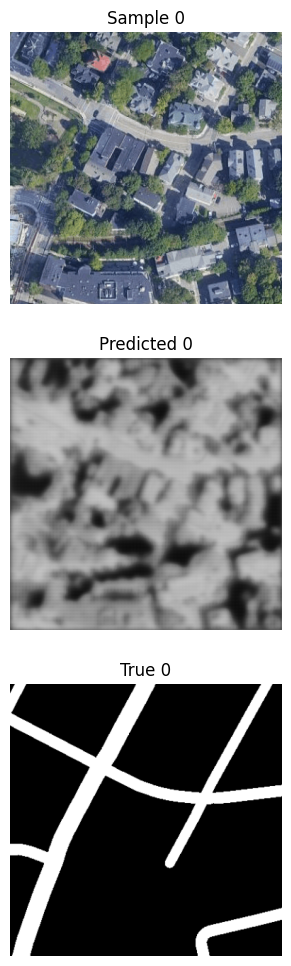

Epoch 2/5:  41%|▍| 12/29 [03:08<04:24, 15.58s/it, loss=0.394, acc=0.835, patch_a

In [ ]:
train(train_dataloader, val_dataloader, model, loss_fn, metric_fns, optimizer, n_epochs)